<a href="https://colab.research.google.com/github/wksmirnowa/compling_homeworks/blob/master/HW05_Topic_model_BigARTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Установка BigARTM

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [10]:
cd ../.. 

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 7.1MB 9.3MB/s 
     |████████████████████████████████| 256kB 51.8MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771461 sha256=2dc0f4b1447195e827ccd98193ae8f69d892a89ec8a1324e78eee303db7e2668
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [12]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
import pymorphy2
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-04 07:50:28--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-04 07:50:29--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  71.1MB/s    in 0.3s    

2020-02-04 07:50:30 (71.1 MB/s) - ‘habr_texts.t

In [14]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


### Предобработка текстов

Уберем дополнительные ненужные знаки препинания и стоп-слова.

In [0]:
string.punctuation += '«»—…“”–→•'

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
added_stops = {'весь', 'это', 'наш', 'оно', 'итак', 'т.п', 'т.е', 'мало', 'меньше', 'ещё', 'слишком', 'также', 'ваш', 'б', 'хм'}
stops = stops.union(added_stops)

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

## Обучение модели


Попробуем сразу обучить модель с нграммами.

Здесь я пробовала увеличивать и уменьшать threshold, но в итоге увидела, что лучше всего модель сработала с threshold=0.3.

In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts], 30000)

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, 
                           common_terms=set(stopwords.words('russian'))) 
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [0]:
p[texts[1]]

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(ngrammed_habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

Посмотрим, что будет, если размер батча увеличить в 10 раз. Я пробовала оставлять размер прежним, что не сильно влияло не результаты.

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',
                                        data_format='vowpal_wabbit',
                                        target_folder='batches',
                                       batch_size=10000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches',
                                        data_format='batches')

In [0]:
dictionary = artm.Dictionary()

In [76]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=79d262d0-ea3c-4e1b-bbbe-cc3281872da4, num_entries=21889)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [0]:
Посмотрим на словарь с нграммами.

In [0]:
dopen = open('dict.txt', 'r')
print(dopen.read())

Думаю, словарь получился нормальный, можно идти дальше.

Попробуем увеличить количество тем до 300.

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(300)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 300)])
                                    ]
                        )


In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10))

### Тренируем модель

Добавим количество проходов по текстам.

In [0]:
model_artm.num_document_passes = 4
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=4)

Посмотрим на график и метрики. Предыдущая перплексия была 878.205, тут она стала получше. Я пробовала оставлять прежний размер батчей и увеличивать его, оставлять прежнее количество проходов по документам и увеличивать его значение до 3 и, наконец, дошла до 4. Перплексия 537.813 пока что оказалась лучшей на данном этапе. Значит,можно приступать к регуляризаторам.

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.005 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 537.813 (ARTM)


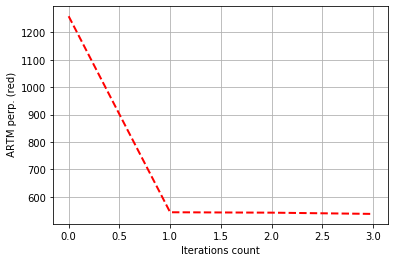

In [82]:

print_measures(model_artm)

Количество тем у них мы тоже увеличим до 300.

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 300)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 300)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Я попробовала поменять размеры коэффициентов, на которые мы умножаем phi_tau и theta_tau, и пришла к выводу, что лучше всего себя модель ведет себя, когда они такие, как в изначальной тетрадке.

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

К чему в итоге мне удалось прийти после того, как я попробовала поменять разные параметры. Я меняла количество тем, размер батчей, threshold в нграммере и прочие параметры, но самый лучший результат был мной достигнут с теми параметрами, которые есть сейчас в этой тетрадке:

* threshold=0.3 у нграммера
* число батчей 10000
* число тем 300
* число проходов по темам 4


Sparsity Phi: 0.920 ARTM)
Sparsity Theta: 0.687 (ARTM)
Kernel contrast: 0.253 (ARTM)
Kernel purity: 0.313 (ARTM)
Perplexity: 198.318 (ARTM)


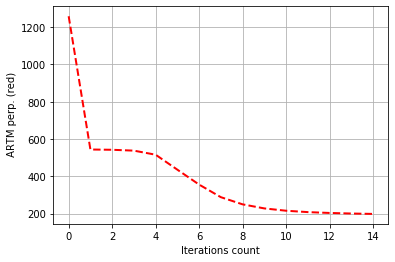

In [86]:
print_measures(model_artm)

Предыдущий результат перплексии был 491.399, мы получили 198.318. Кажется, здесь уже можно остановиться, но для начала надо посмотреть на получившиеся темы.

In [97]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
который_мочь
который_позволять
весь_ещё
это_случай
весь_необходимый
мочь_использовать
который_хотеть
это_позволить
который_использоваться
становиться_весь
---------
topic_1: 
атака
безопасность
злоумышленник
защита
хакер
угроза
взлом
вредоносный
уязвимость
жертва
---------
topic_2: 
экран
дисплей
модель
планшет
подсветка
ридер
устройство
плюс
формат
её
---------
topic_3: 
google
youtube
гугл
распространение
открытый
корпорация
яндекс
рекламный
собственный
alphabet
---------
topic_4: 
процессор
чип
транзистор
инструкция
архитектура
компьютер
шина
intel
кристалл
разработать
---------
topic_5: 
дрон
управление
аппарат
дронов
полёт
мотор
управлять
камера
способный
машина
---------
topic_6: 
дом
голос
общаться
марка
категория
развлечение
умный_дом
голосовой
помощник
собственный
---------
topic_7: 
заказчик
клиент
мониторинг
правило
админ
сервис
исполнитель
инфраструктура
техподдержка
инцидент
---------
topic_8: 
ошибка
анализатор
pvs-studio
проверка
инструмент
ссылка
статический_а

По-моему, вполне неплохо. Можно найти четко обозначенные темы, например:

```
topic_44: 
vr
виртуальный_реальность
форум
реальность
виртуальный
шлем
oculus
устройство
движок
погружение
```
```
topic_32: 
смартфон
сканер
устройство
камера
палец
сканирование
размер
xiaomi
дисплей
корпус
```
```
topic_29: 
робот
ребёнок
родитель
школа
робототехника
yahoo
будущее
деталь
взрослый
обучение
```
```
topic_1: 
атака
безопасность
злоумышленник
защита
хакер
угроза
взлом
вредоносный
уязвимость
жертва
```
```
topic_6: 
дом
голос
общаться
марка
категория
развлечение
умный_дом
голосовой
помощник
собственный
```